<h1 style="background-color:powderblue;">.</h1>

<h1 style="background-color:powderblue;"><h1 style = "font-size:300%;"><center><b>World Happiness Report</b></center></h1>.</h1>

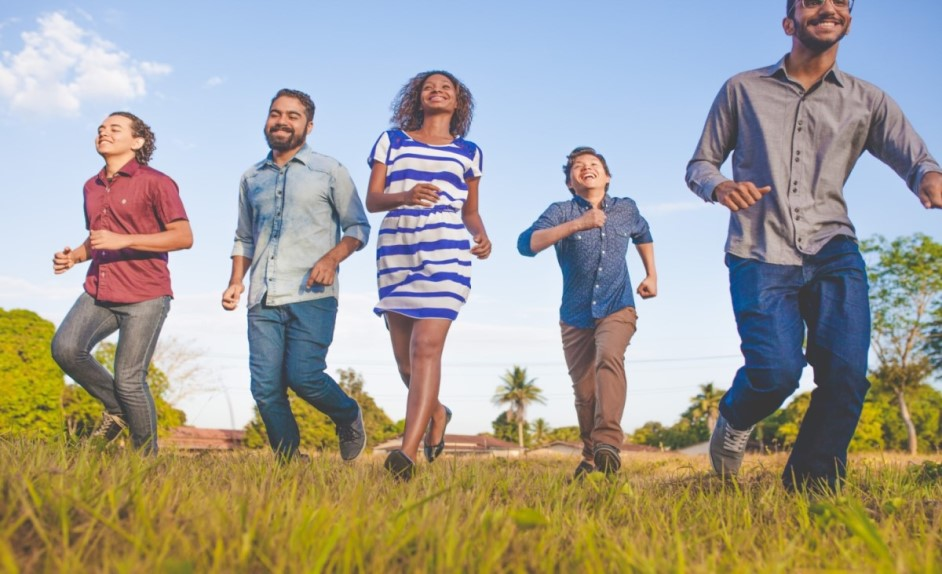

The World Happiness Report is a landmark survey of the state of global happiness . The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

The happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. So, let's start our analysis and find out some more interesting relationship about these factors !!

<h2 style="background-color:powderblue;">.</h2>

<h2 style="background-color:powderblue;"><h2 style = "font-size:200%;"><center><b>Knowing and pre-processing of Data</b></center></h2></h2>

In [1]:
# importing important libraries
import pandas as pd
import numpy as np # data pre-processing

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background') # data visualization

import warnings
warnings.filterwarnings("ignore") # additional

In [2]:
df = pd.read_csv('../input/world-happiness-report-2021/world-happiness-report-2021.csv') # loading the data

In [3]:
df.head() # first five rows of data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df.shape # number of rows and columns respectively

(149, 20)

In [5]:
df.columns # name of all columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

* There is no null value in our data (each column has 149 non-null count).
* There are 18 float value columns.
* Only two columns are having object values which are 'Country name' and 'Regional indicator'.

In [7]:
df.nunique()

Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142


* Here we can see that not all the 149 values in each column is unique.
* Note the unique value count of each column.
* 'Regional indicator' is having only 10 object values implies that this column is categorical type.

In [8]:
df.duplicated().sum()

0

* There is no duplicacy in our data.

<h2 style="background-color:powderblue;">.</h2>

<h2 style="background-color:powderblue;"><h2 style = "font-size:200%;"><center><b>Data Visualization</b></center></h2></h2>

## Dataset information :

**1. Country**

Name of the country

**2. Happiness Rank**

Rank of the country based on the Happiness Score.

**3. Happiness Score**

A metric measured in 2016 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest"

**4. Whisker High**

Lower Confidence Interval of the Happiness Score

**5. Whisker Low**

Upper Confidence Interval of the Happiness Score

**6.  Economy (GDP per Capita)**

The extent to which GDP contributes to the calculation of the Happiness Score.

**7. Family**

The extent to which Family contributes to the calculation of the Happiness Score

**8. Health (Life Expectancy)**

The extent to which Life expectancy contributed to the calculation of the Happiness Score

**9. Freedom**

The extent to which Freedom contributed to the calculation of the Happiness Score

**10. Trust (Government Corruption)**

The extent to which Perception of Corruption contributes to Happiness Score

**11. Generosity**

The extent to which Generosity contributed to the calculation of the Happiness Score

**12. Dystopia Residual**

The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

<h2 style="background-color:mediumseagreen;">.</h2>

## Univariate Variable Analysis.

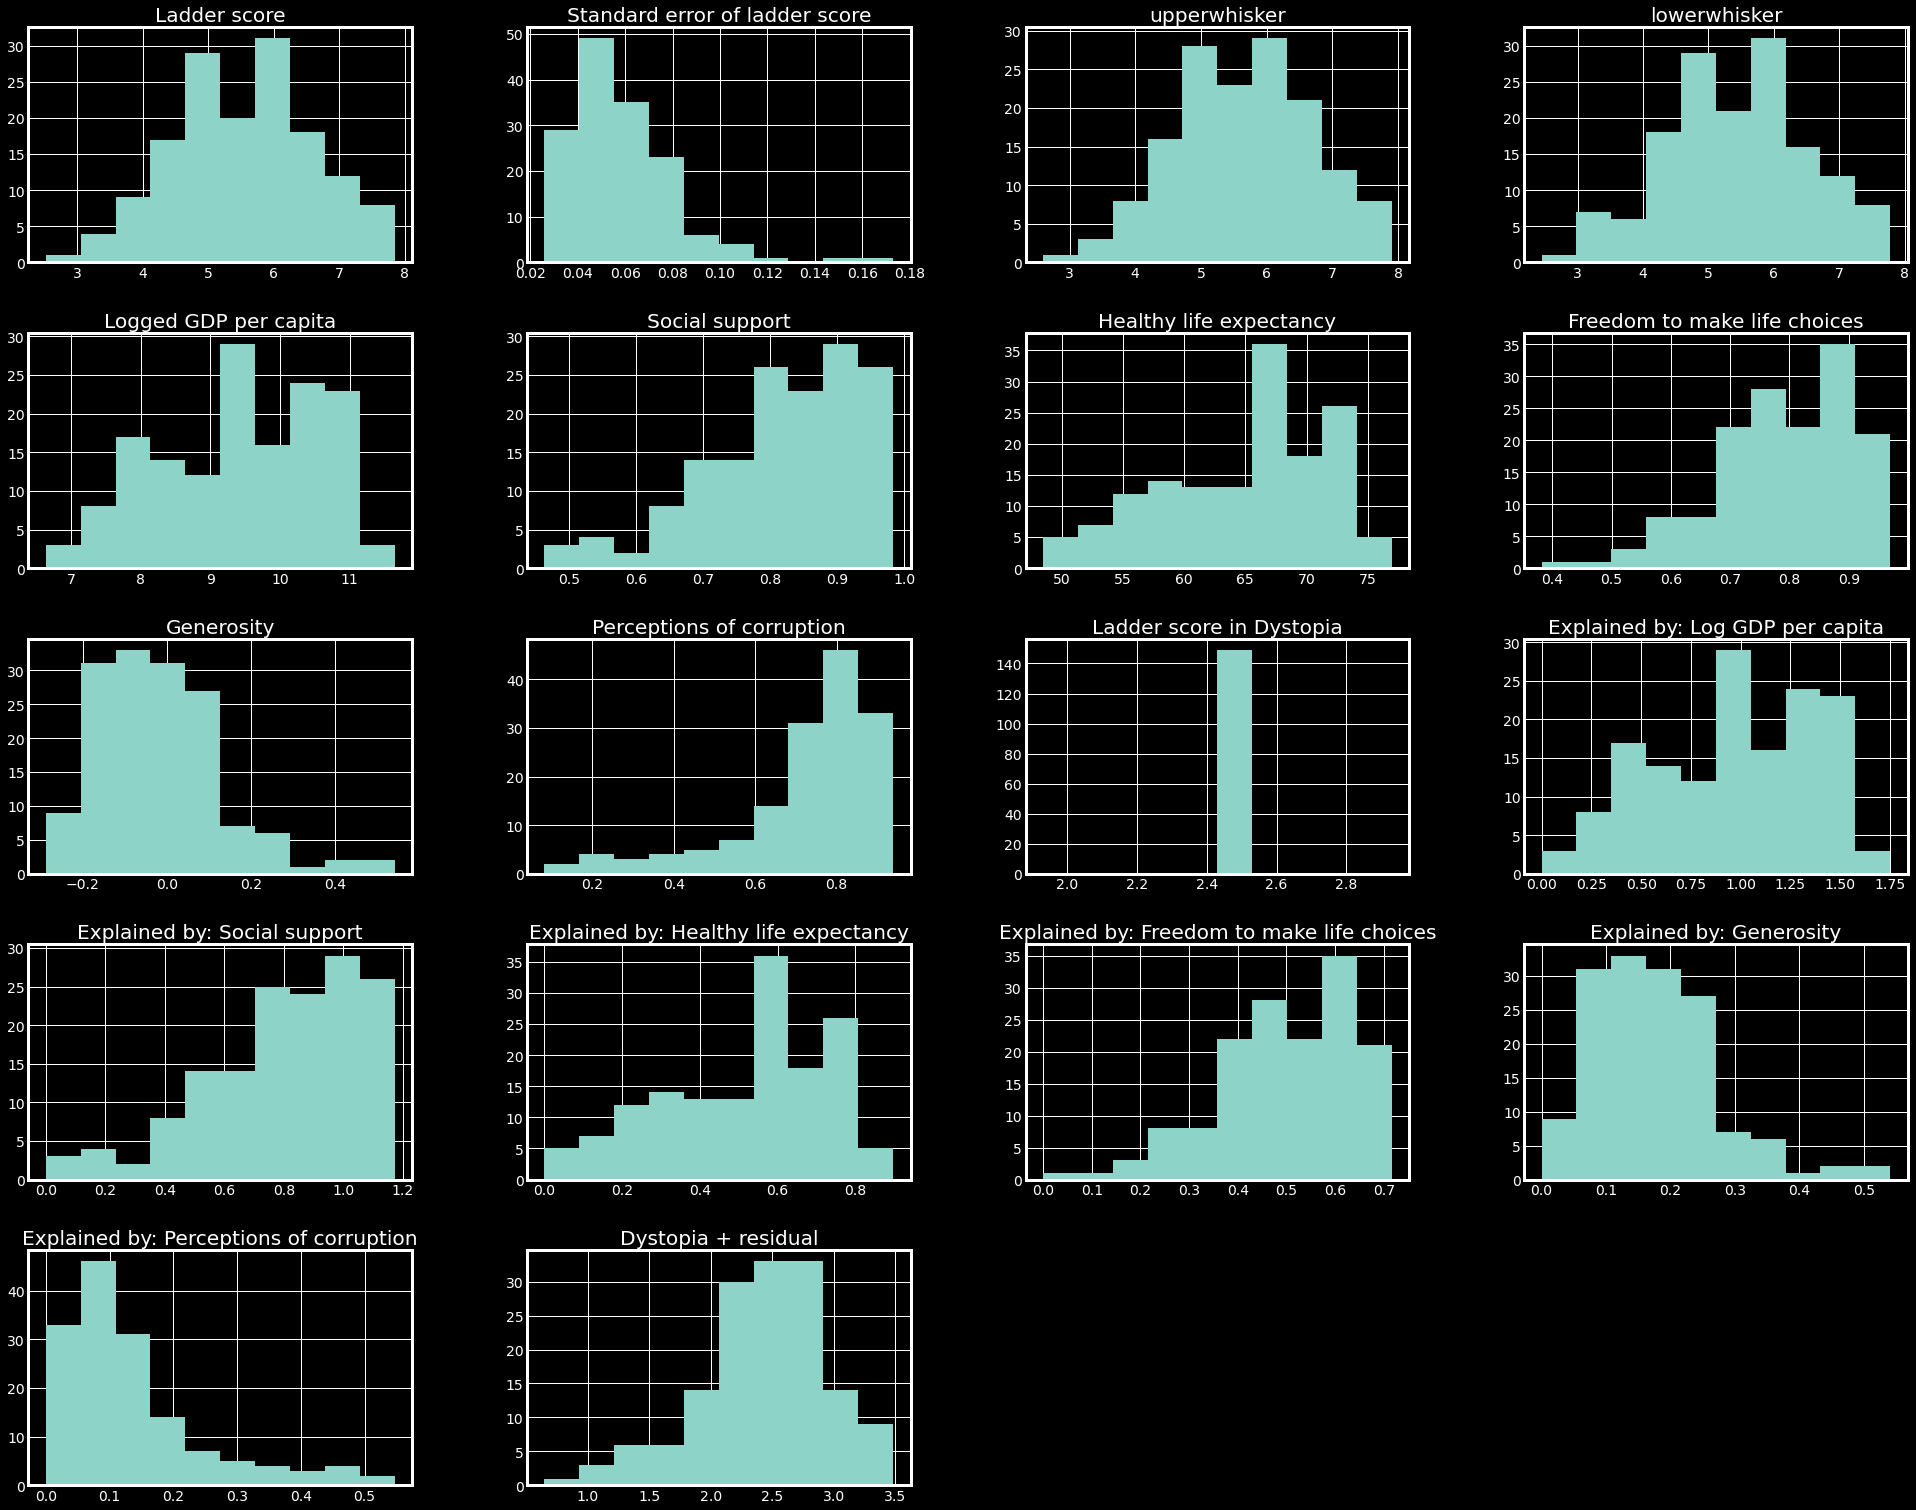

In [9]:
df.hist(figsize=(30,25))
plt.show()

* Not all features are normally distributed.
* Except few columns like 'Perceptions of corruption'(left skewed) and 'Explained by: Perception of corruption'(right skewed) hist plots are tending to normal distribution only in a broad perception. 

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,0.022001,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,0.114889,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,0.113332,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,0.150657,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,0.179226,0.082,0.667,0.781,0.845,0.939


* Note max-min value for each variable.
* Note quarter percentiles for each variable. 

<h2 style="background-color:mediumseagreen;">.</h2>

## Bivariate Variable Analysis.

<AxesSubplot:>

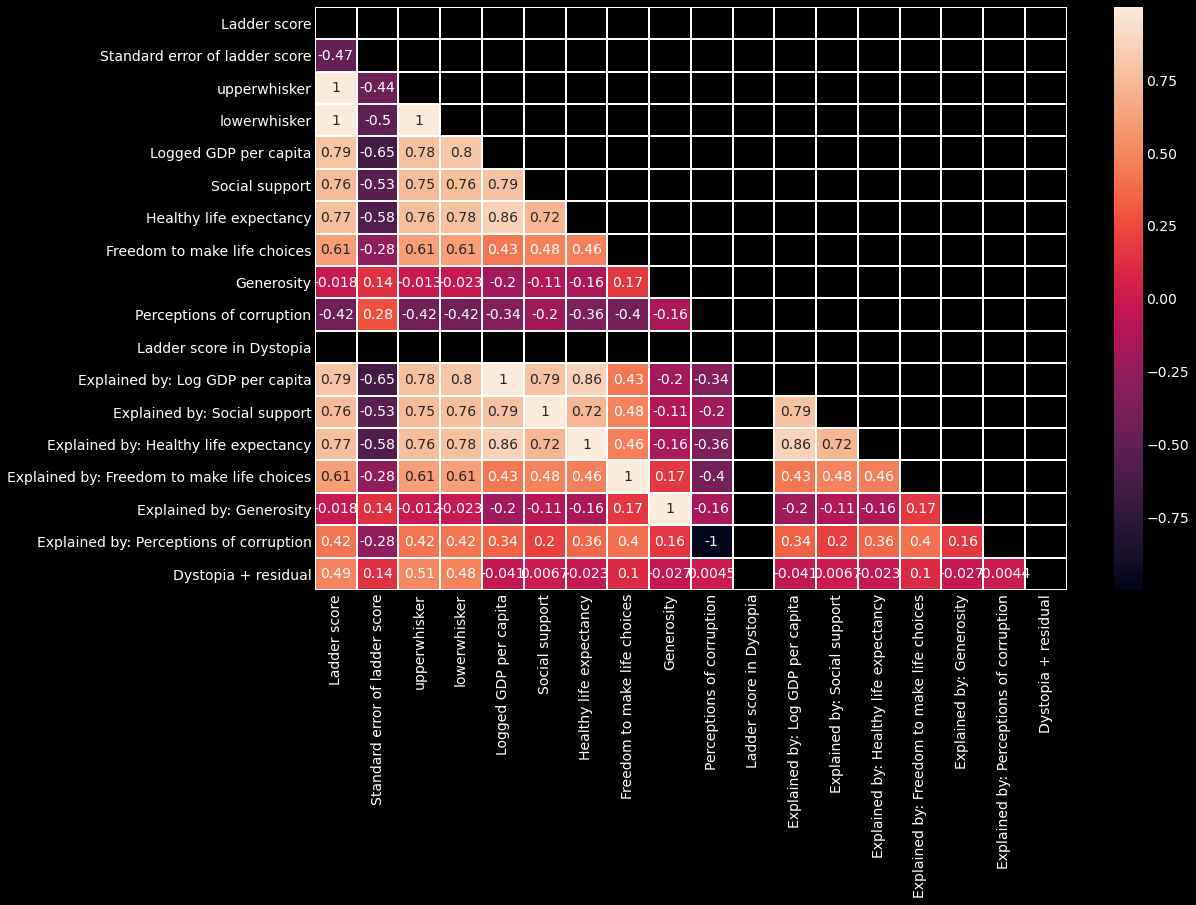

In [11]:
plt.figure(figsize=(15,10))
sub = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.15, mask=sub)

* Note the correlation between all feautures.
* Note that what all factors are affecting the 'Ladder score' i.e., happiness index the most.

<AxesSubplot:xlabel='Regional indicator', ylabel='Ladder score'>

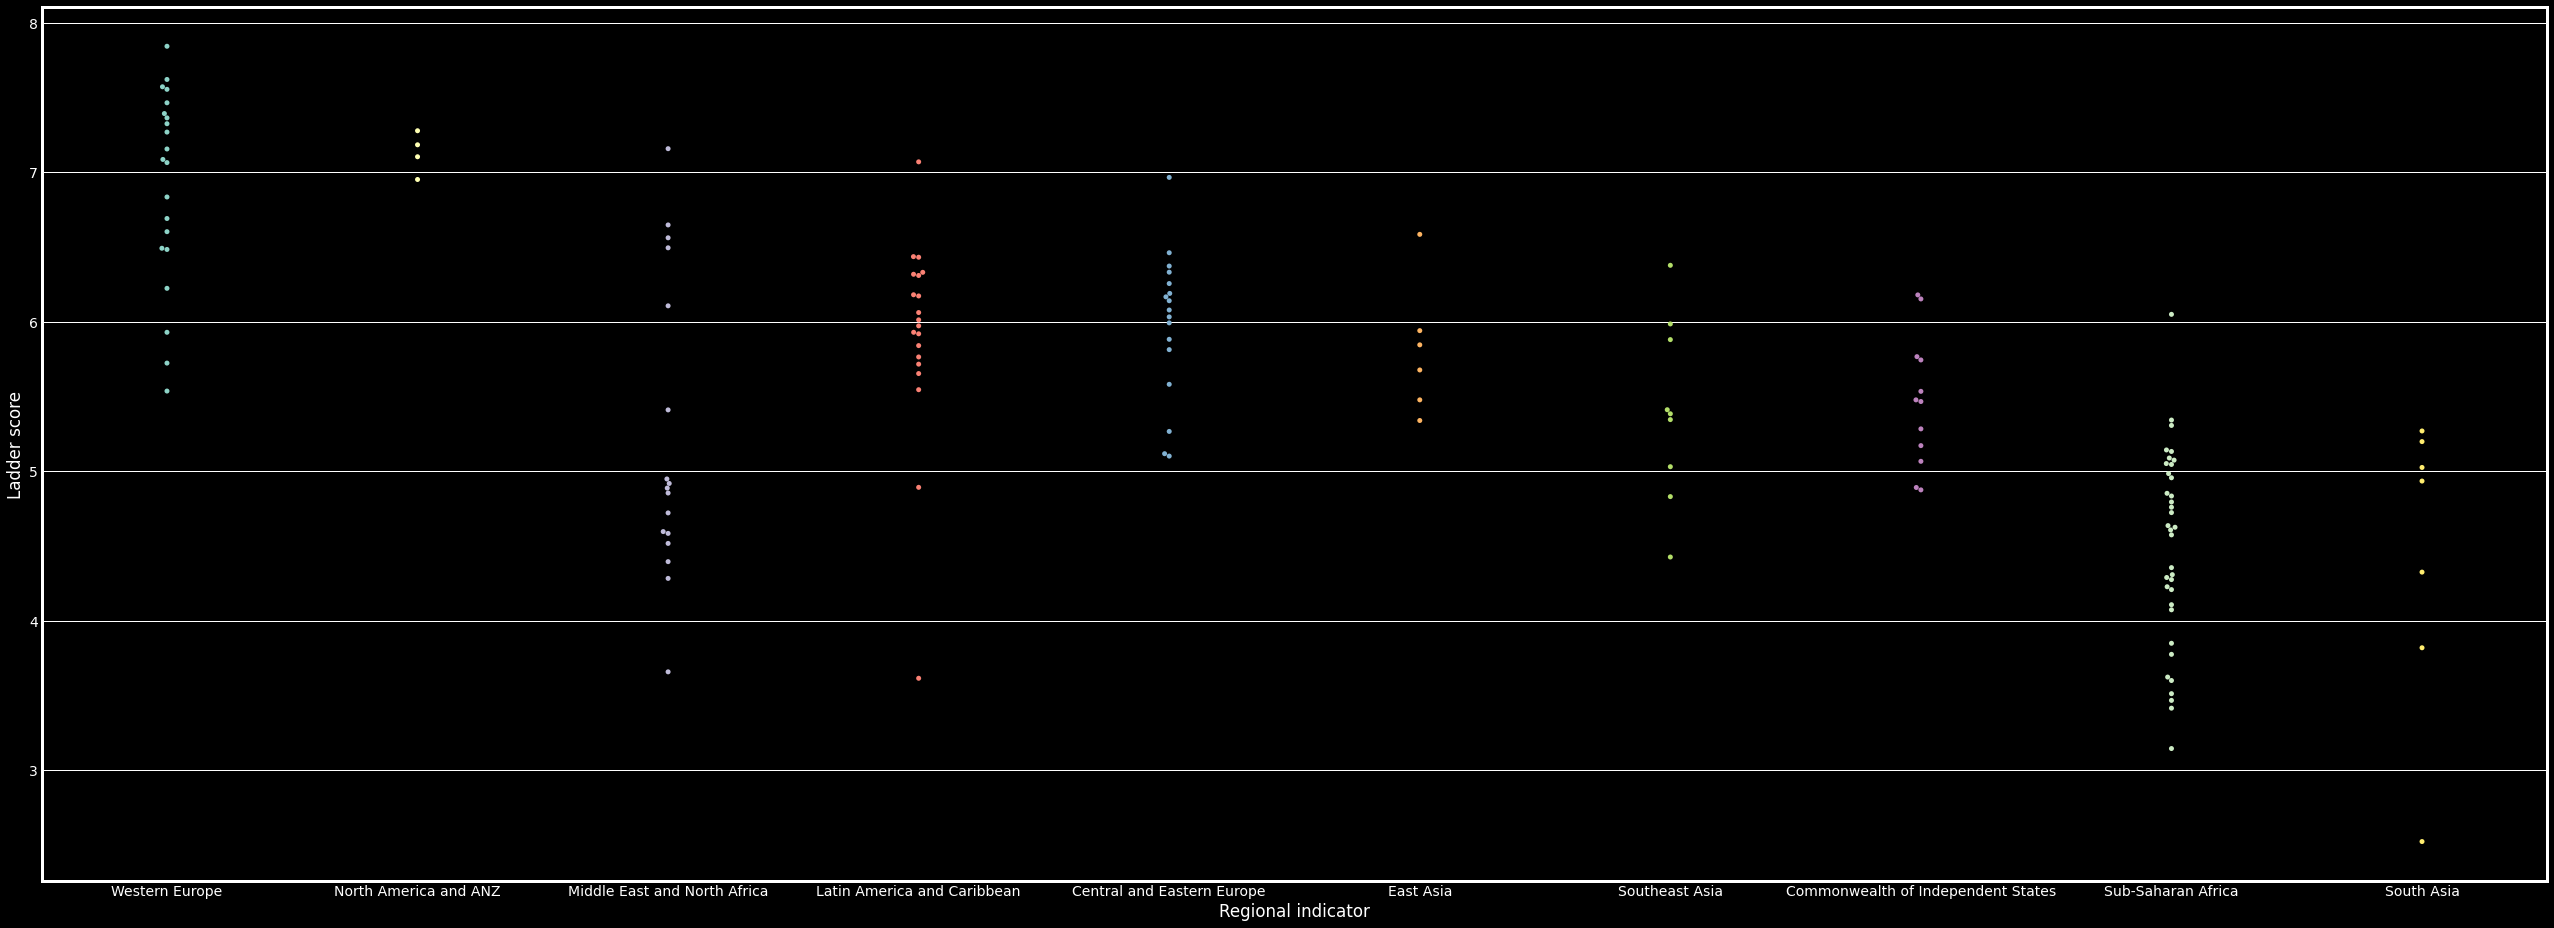

In [12]:
plt.figure(figsize=(40,15))
sns.swarmplot(df['Regional indicator'],df['Ladder score'])

* Western European countries are having higher ladder score whereas South Asian countries are hitting the bottom.


<AxesSubplot:xlabel='Regional indicator', ylabel='Ladder score'>

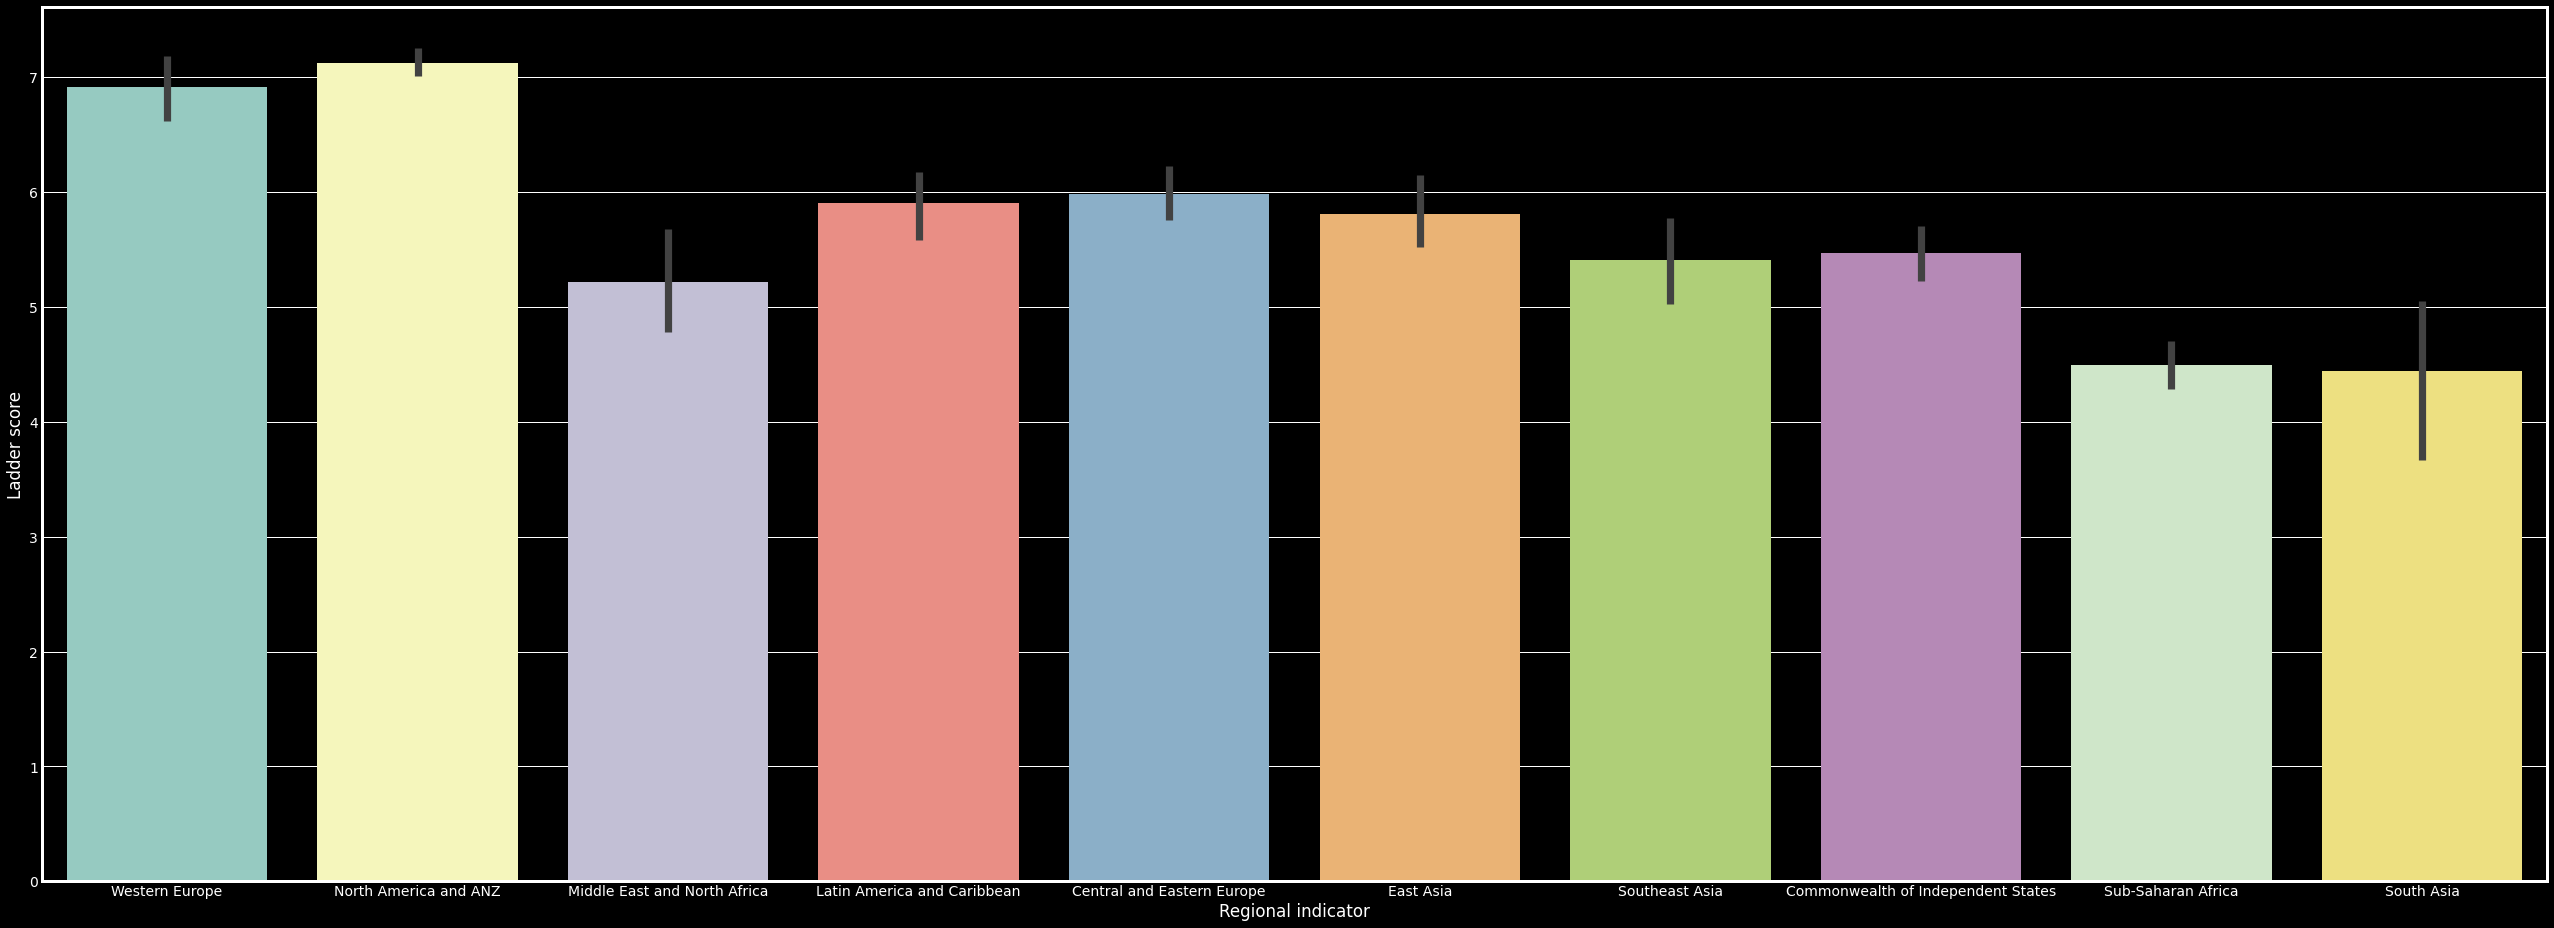

In [13]:
plt.figure(figsize=(40,15))
sns.barplot(x=df['Regional indicator'], y=df['Ladder score'])

* Collective Ladder score is highest for North America and ANZ region and lowest for South Asia.

In [14]:
sub_df = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Ladder score in Dystopia']

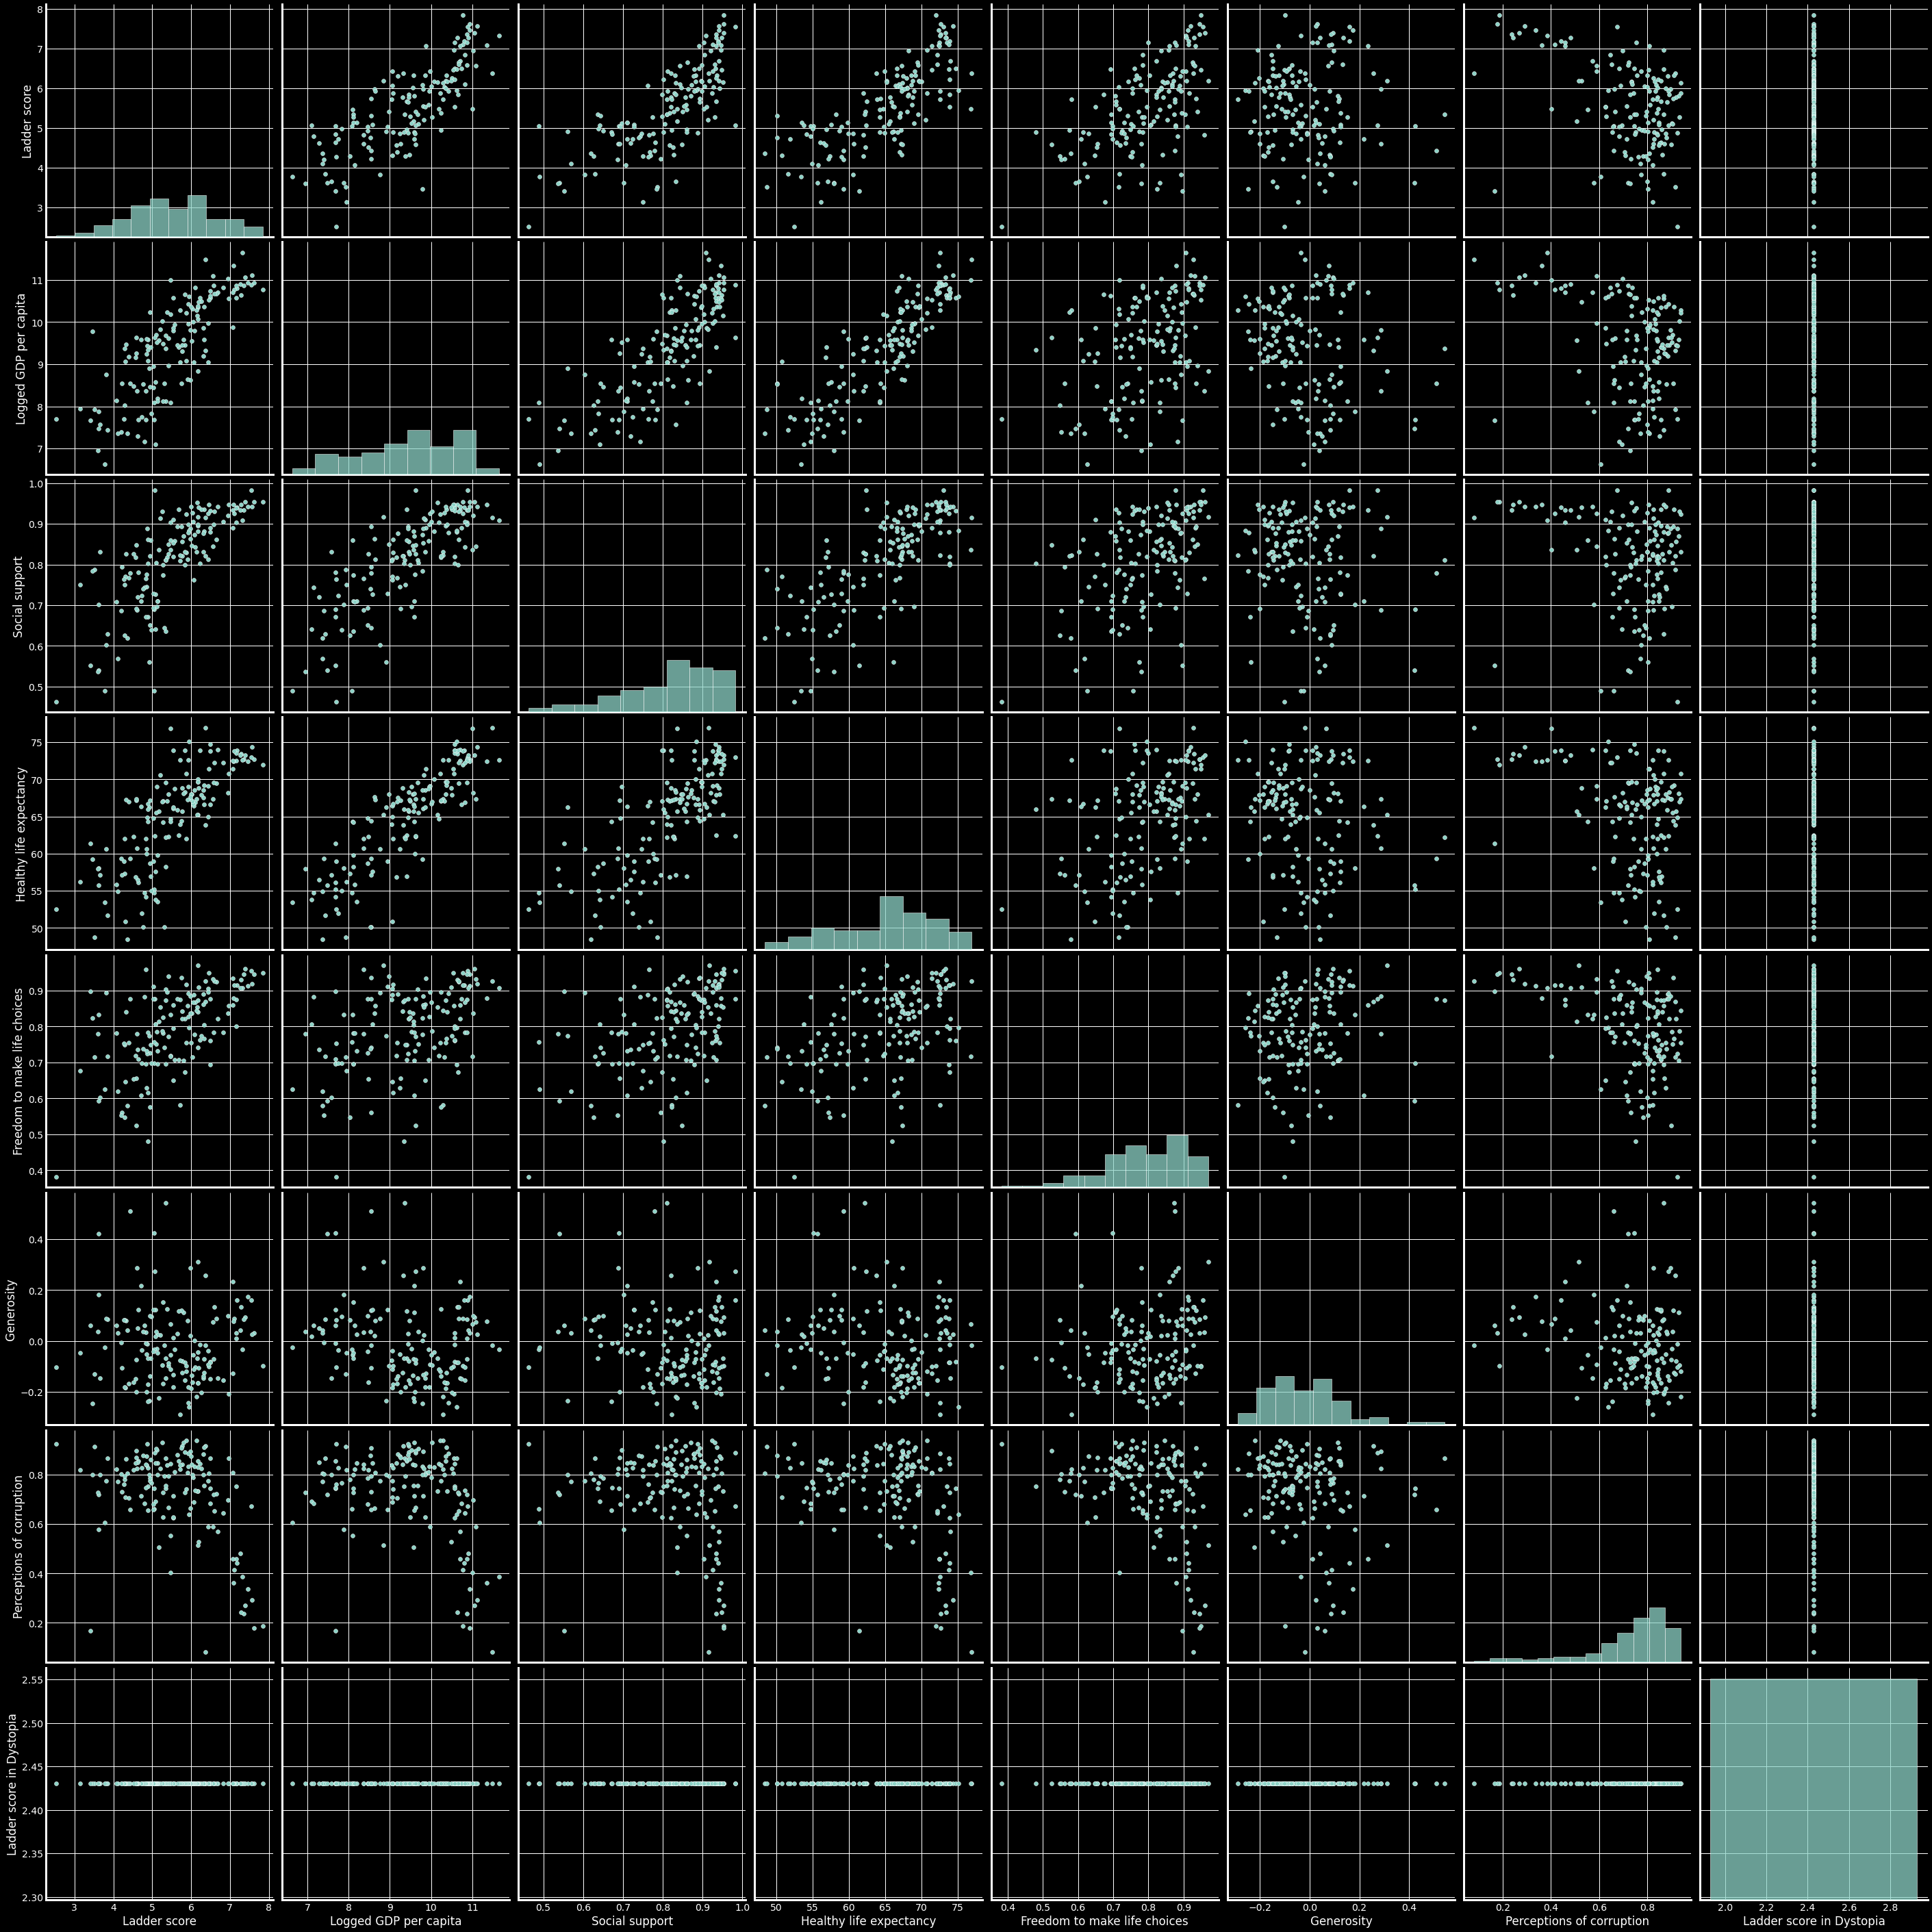

In [15]:
sns.pairplot(df[sub_df],height=5)

* Note the mutual relationship between bivariables. 
* Note that how ladder score is depicting a positive relationship with Logged GDP per capita, Social Support, Healthy life expectancy and few other features.

In [16]:
life_exp = df[['Country name','Regional indicator','Logged GDP per capita','Social support','Ladder score','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption']].sort_values('Ladder score', ascending = True)

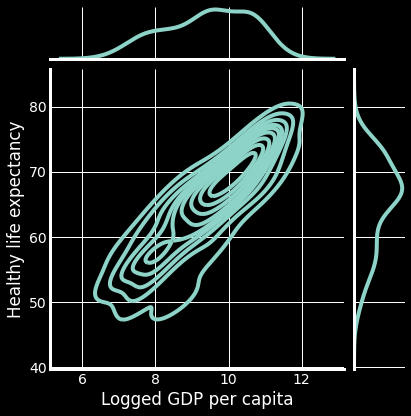

In [17]:
sns.jointplot(x=life_exp['Logged GDP per capita'], y=life_exp['Healthy life expectancy'], kind="kde")

* This is a **joint density plot** between two features.
* **Healthy life expectancy** shows a **positive relationship** with **Logged GDP per capita** in a steep manner.

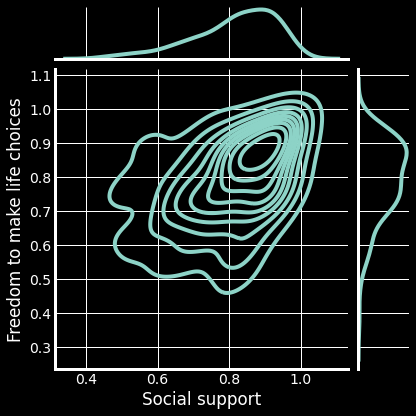

In [18]:
sns.jointplot(x=life_exp['Social support'], y=life_exp['Freedom to make life choices'], kind="kde")

* This is **Joint density plot** between **'Freedom to make life choices** and **'Social support'**.
* Social support shows **a positive relationship** with Freedom to make life choices but not in very steep manner.

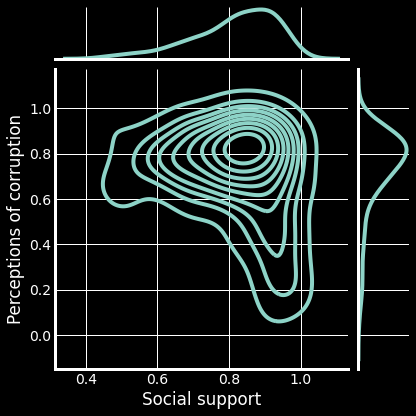

In [19]:
sns.jointplot(x=life_exp['Social support'], y=life_exp['Perceptions of corruption'], kind="kde")

* This is **Joint density plot** between **'Perceptions of corruption** and **'Social support'**.
* They doesn't show that steep positive relationship.

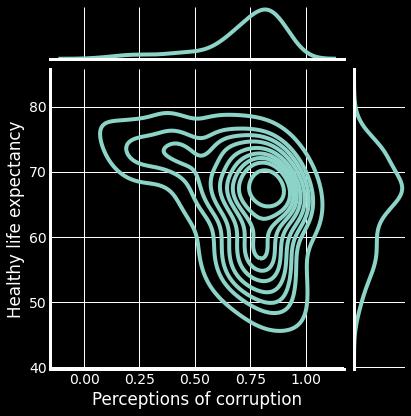

In [20]:
sns.jointplot(x=life_exp['Perceptions of corruption'], y=life_exp['Healthy life expectancy'], kind="kde")

* This is **Joint density plot** between **'Perceptions of corruption'** and **'Healthy life expectancy'**.
* They doesn't show that steep positive relationship as densiti is not increasing simultaneously and linearly.

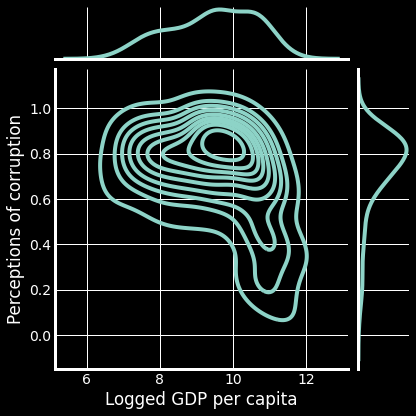

In [21]:
sns.jointplot(x=life_exp['Logged GDP per capita'], y=life_exp['Perceptions of corruption'], kind="kde")

* This is **Joint density plot** between **'Perceptions of corruption'** and **'Logged GDP per capita'**.
* They doesn't show that steep positive relationship.

<h2 style="background-color:mediumseagreen;">.</h2>

## Trivariate Variable Analysis.

<AxesSubplot:xlabel='Country name', ylabel='Perceptions of corruption'>

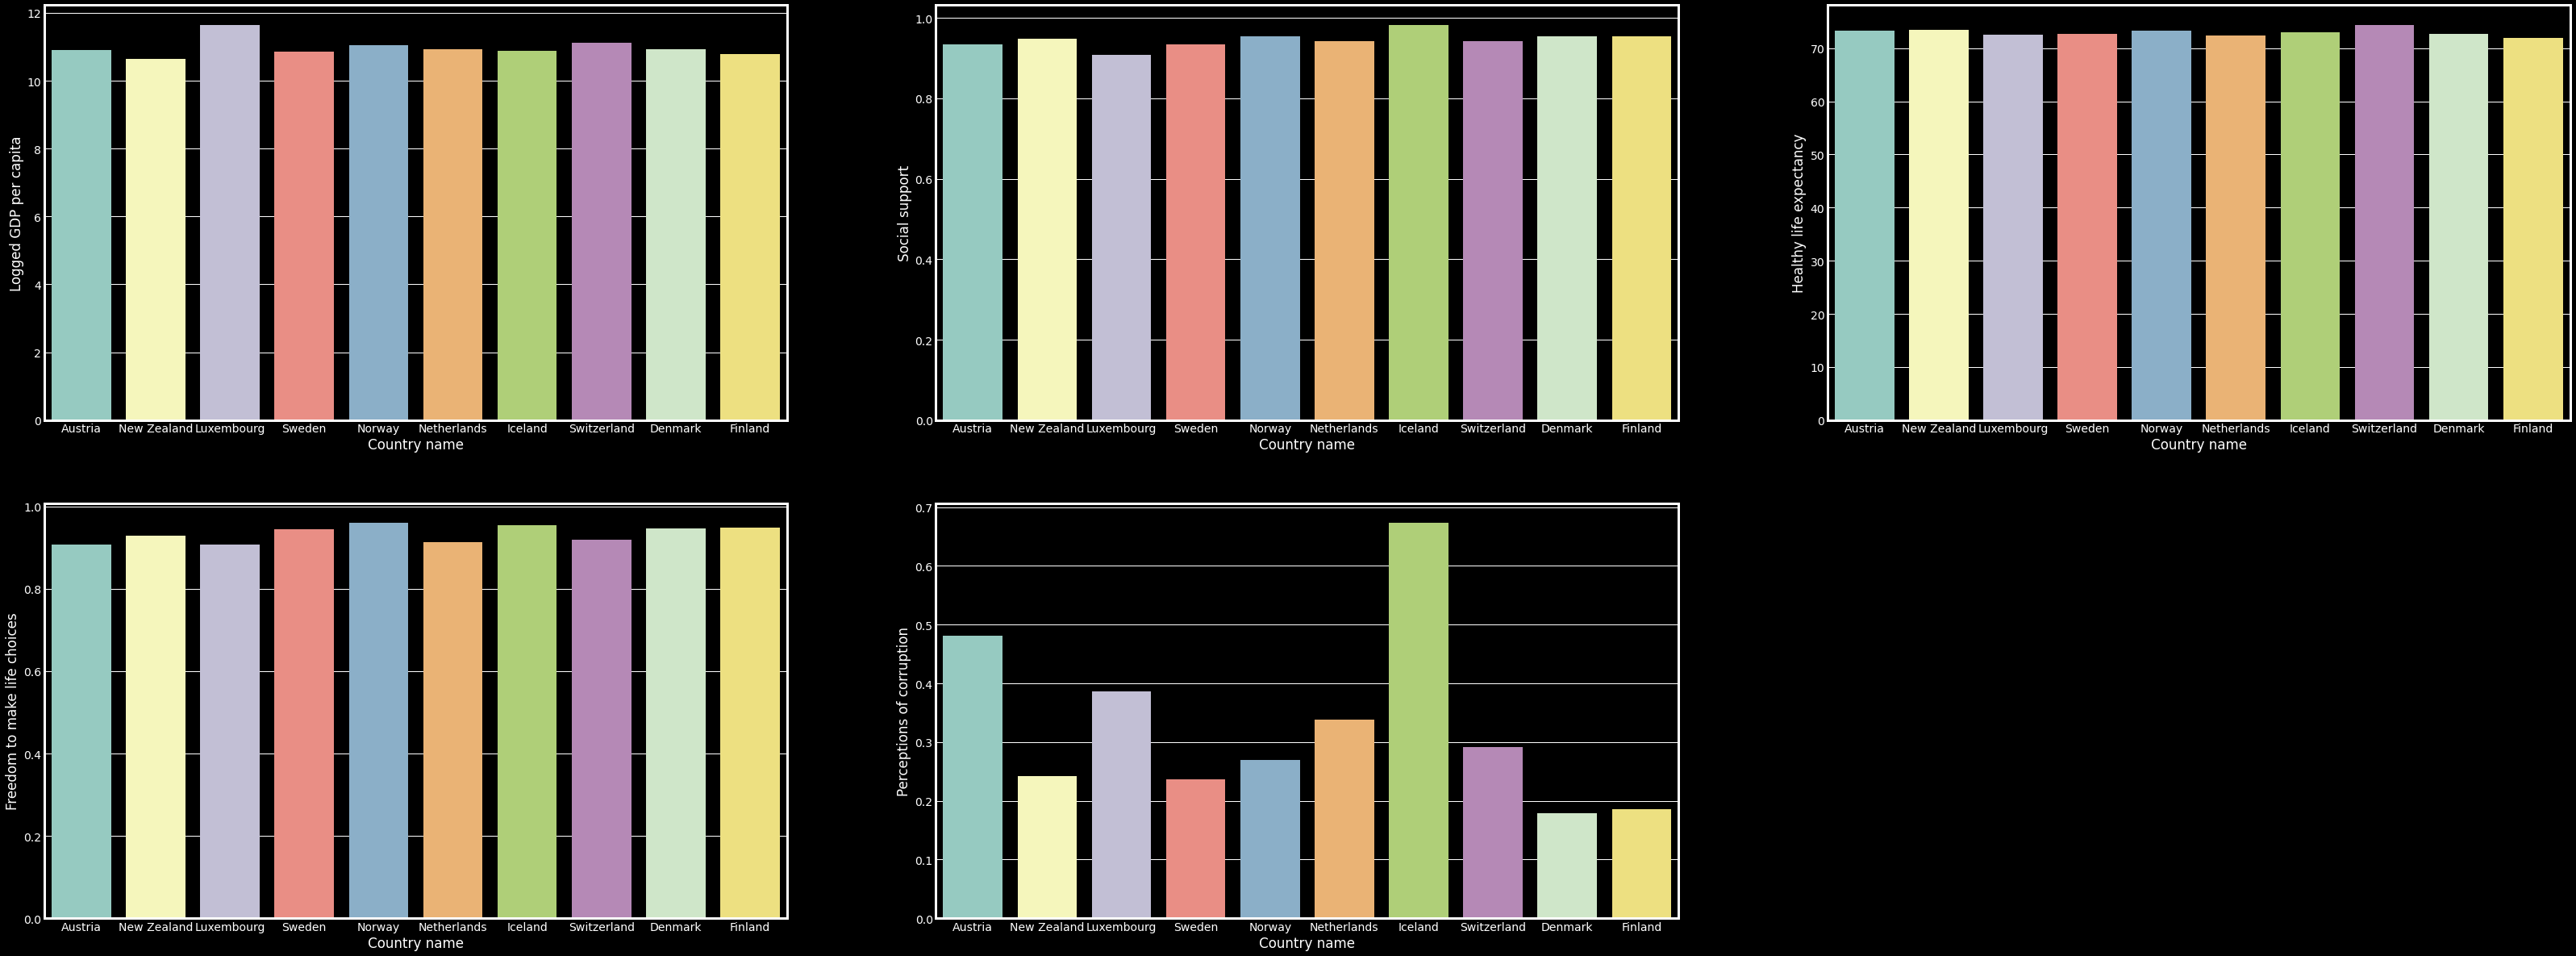

In [22]:
plt.figure(figsize=(50,30))
plt.subplot(3,3,1)
sns.barplot(x=life_exp['Country name'][139:],y=life_exp['Logged GDP per capita'][139:])
plt.subplot(3,3,2)
sns.barplot(x=life_exp['Country name'][139:],y=life_exp['Social support'][139:])
plt.subplot(3,3,3)
sns.barplot(x=life_exp['Country name'][139:],y=life_exp['Healthy life expectancy'][139:])
plt.subplot(3,3,4)
sns.barplot(x=life_exp['Country name'][139:],y=life_exp['Freedom to make life choices'][139:])
plt.subplot(3,3,5)
sns.barplot(x=life_exp['Country name'][139:],y=life_exp['Perceptions of corruption'][139:])

* These barplot shows top 10 countries with highest Ladder score i.e., happiness index.
* **Finland** has the **highest ladder score** where as Austria is has lowest ladder score amongst these 10.
* Ideally each plot must go from lower to higher steep manner as happiness is assumed to increased with increased Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices and Perceptions of corruption.
* Each feature is more or less showing assumed dependency except Perceptions of corruption.

<AxesSubplot:xlabel='Country name', ylabel='Perceptions of corruption'>

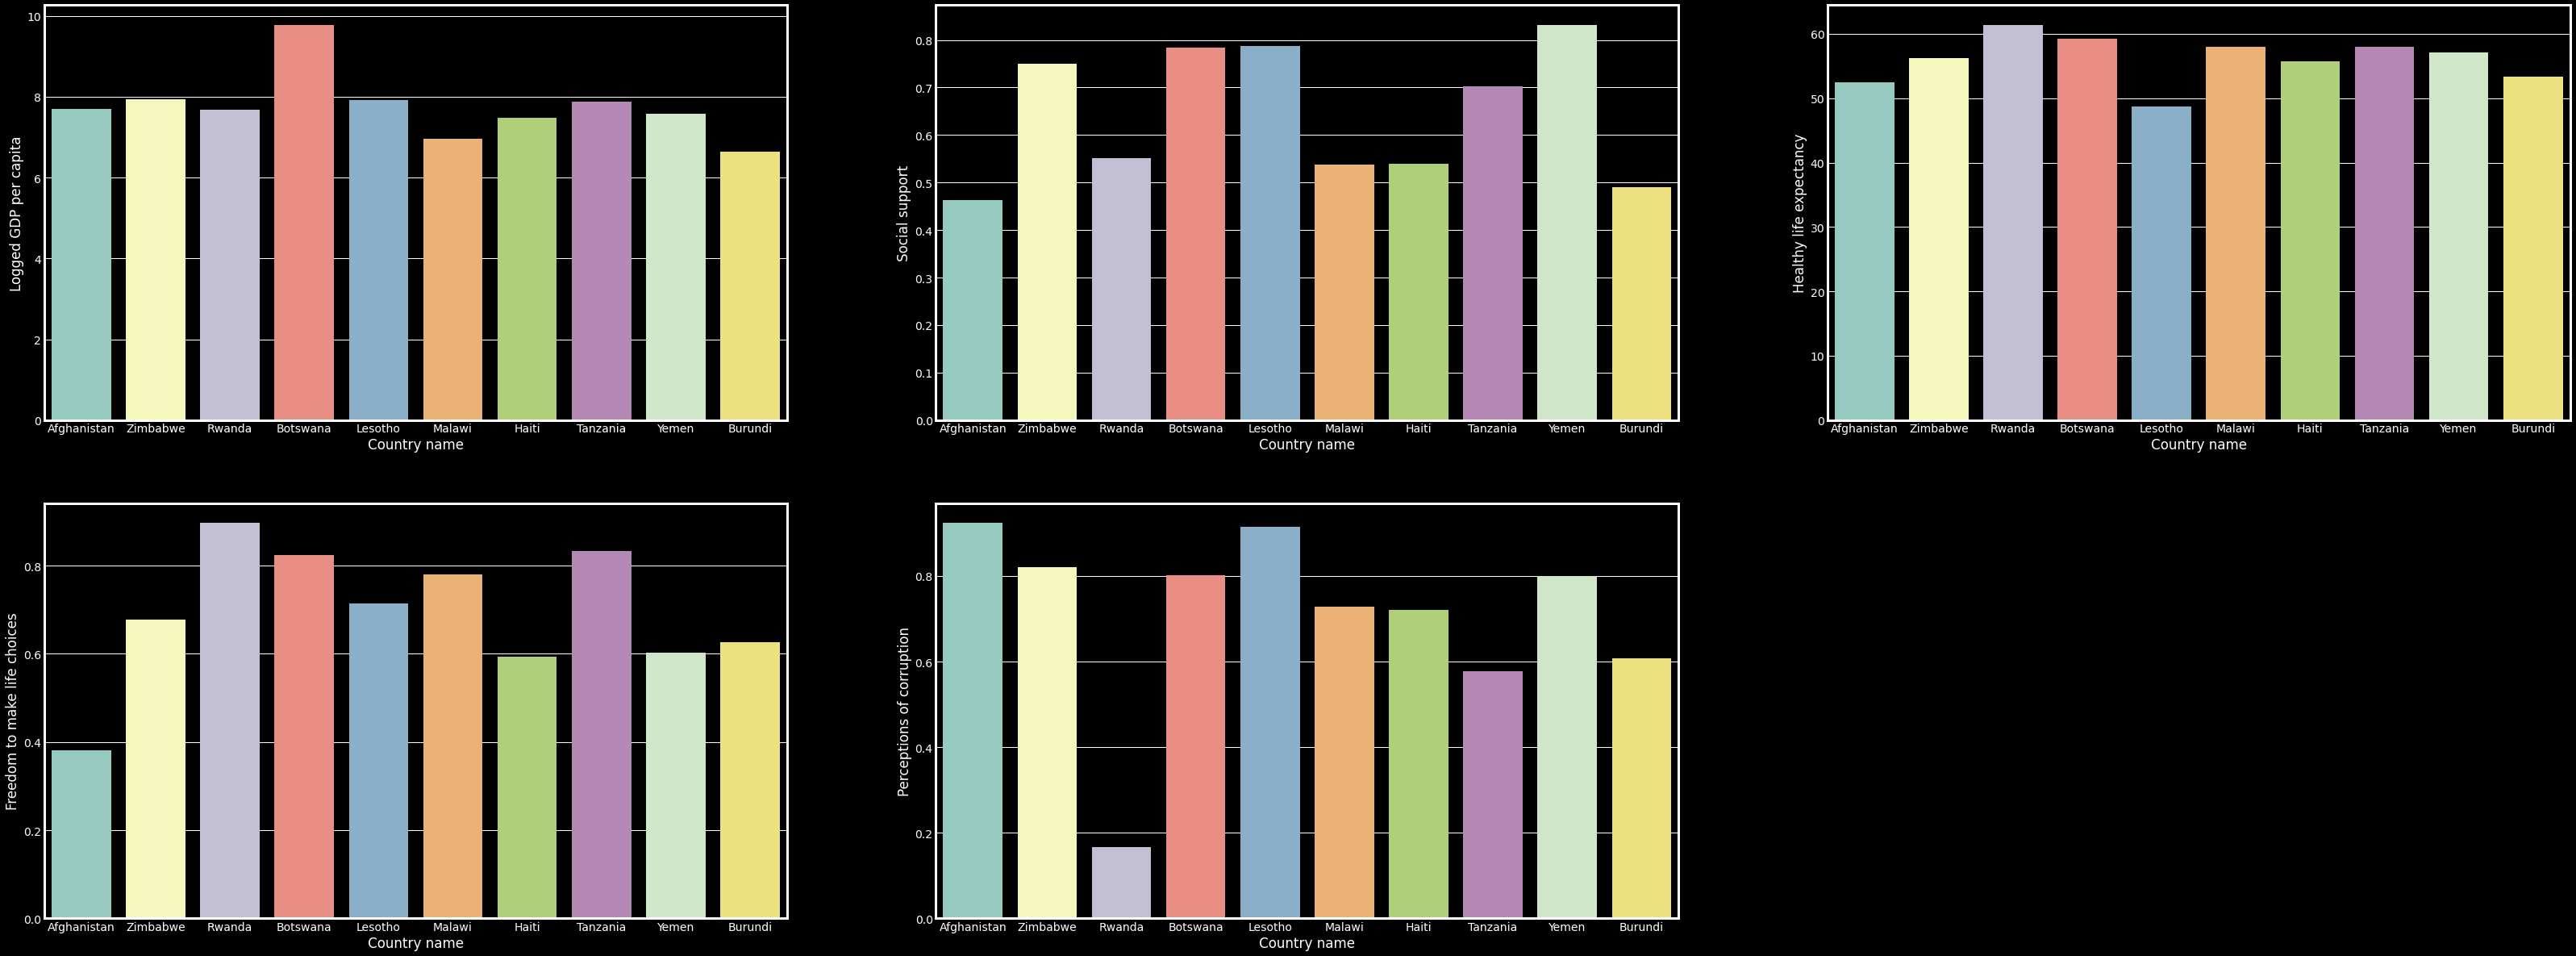

In [23]:
plt.figure(figsize=(50,30))
plt.subplot(3,3,1)
sns.barplot(x=life_exp['Country name'][:10],y=life_exp['Logged GDP per capita'][:10])
plt.subplot(3,3,2)
sns.barplot(x=life_exp['Country name'][:10],y=life_exp['Social support'][:10])
plt.subplot(3,3,3)
sns.barplot(x=life_exp['Country name'][:10],y=life_exp['Healthy life expectancy'][:10])
plt.subplot(3,3,4)
sns.barplot(x=life_exp['Country name'][:10],y=life_exp['Freedom to make life choices'][:10])
plt.subplot(3,3,5)
sns.barplot(x=life_exp['Country name'][:10],y=life_exp['Perceptions of corruption'][:10])

* These barplot shows bottom 10 countries with lowest Ladder score i.e., happiness index.
* **Afghanistan** has the **lowest ladder score** where as Burundi is has highest ladder score amongst these 10.
* Ideally each plot must go from lower to higher steep manner as happiness is assumed to increased with increased Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices and Perceptions of corruption.
* Each feature is more or less showing assumed dependency except Social support and Perceptions of corruption.

<h1 style="background-color:powderblue;">.</h1>

## Thank-you ! Feel free to give your reviews and suggestions ! 😄